In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('RandomForests/petrol_consumption.csv')
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
X = dataset.iloc[:, 0:4].values   # divide into data and labels
y = dataset.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[ 1.35447518, -1.33452296, -0.31161731, -1.48308699],
       [ 0.36314126,  0.15174391, -1.44873146, -0.57895909],
       [ 0.36314126, -1.6194839 , -0.10974518, -0.5080471 ],
       [-0.62819265, -1.26188585,  0.29615525, -1.03988704],
       [ 0.36314126, -2.33654247,  0.19346729,  0.02379284],
       [-0.62819265, -0.78322597,  0.1560037 ,  0.16561682],
       [ 0.36314126, -1.47048471, -0.62291545, -1.58945498],
       [-0.62819265,  0.2448684 , -0.31458205,  0.87473675],
       [ 0.36314126,  1.50577399, -0.98865707, -0.41940711],
       [ 0.36314126,  0.13684399,  0.0357968 , -0.82715107]])

In [6]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [7]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squared Error: 64.93201637097064


In [8]:
import pandas as pd
import numpy as np
data = pd.read_csv('../house-prices-advanced-regression-techniques/houseSmallData.csv')
data.head()

numeric = data.select_dtypes(include=[np.number])
numeric.head()
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[:7].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF'],
      dtype='object')

In [9]:
X = data[cols]
y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF
0,7,1710,548,2,2003,856
1,6,1262,460,2,1976,1262
2,7,1786,608,2,2001,920
3,7,1717,642,3,1915,756
4,8,2198,836,3,2000,1145
...,...,...,...,...,...,...
95,6,1470,420,2,1993,680
96,7,1588,472,2,1999,1588
97,4,960,432,1,1965,960
98,5,835,366,1,1920,458


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [11]:
nulls = X_train.isnull().sum().sort_values(ascending=False)[0:20]

print(nulls)
data = X_train.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(data.isnull().sum() != 0)
data.shape

TotalBsmtSF    0
YearBuilt      0
GarageCars     0
GarageArea     0
GrLivArea      0
OverallQual    0
dtype: int64


(80, 6)

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [14]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 32471.0225
Mean Squared Error: 1771248900.988095
Root Mean Squared Error: 42086.207966364644


In [ ]:
#### Error for Linear Regression on same data
Mean Absolute Error: 22547.00727848767
Mean Squared Error: 873115927.2942107
Root Mean Squared Error: 29548.535112492646

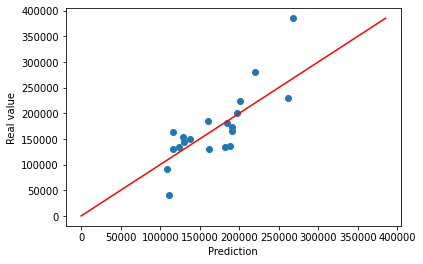

In [17]:
# Build a plot
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()